Kode inspirert fra Espen sirnes,
Data hentet fra oppgave 5

In [57]:
from bs4 import BeautifulSoup  #funksjon som leter etter "html_tags" 
import requests

def find_tags(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all("table")
    return tables

tables=find_tags("https://e24.no/spesial/skattelister/")
tabell=tables[0]

#printing top
print(str(tabell)[:1000])

<table class="table table-sm"><thead><tr><th class="w-5"></th><th class="w-30">Navn</th><th class="text-right clickable">Inntekt<i class="material-icons md-14 middle"></i></th><th class="text-right clickable">Formue</th><th class="text-right clickable">Skatt</th></tr></thead><tbody><tr><td>1<!-- -->.</td><td><div class="name">TROND<!-- --> <!-- -->MOHN</div><div class="text-muted"><a class="text-muted" href="/spesial/skattelister/2020/4601/">Bergen</a>, f.<!-- --> <!-- -->1943</div></td><td class="text-right">303 269 738</td><td class="text-right">3 606 959 160</td><td class="text-right">135 160 646</td></tr><tr><td>2<!-- -->.</td><td><div class="name">IVAR ERIK<!-- --> <!-- -->TOLLEFSEN</div><div class="text-muted"><a class="text-muted" href="/spesial/skattelister/2020/3024/">Bærum</a>, f.<!-- --> <!-- -->1961</div></td><td class="text-right">289 644 215</td><td class="text-right">7 648 362 960</td><td class="text-right">156 536 011</td></tr><tr><td>3<!-- -->.</td><td><div class="nam

In [58]:
def hente_tabel(html):   #funksjon som leser tagsa, henter ut informasjonen og rydder opp
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all("tr"):
        r=[]
        #finding all cells in each row:
        cells=row.find_all("td")
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all("th")
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ""
    else:
        s=" ".join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace("\ue5cf" ,"")
    s=s.replace("\xa0","")
    s=s.replace("\n","")
    s=s.replace("f.","")
    return s

table=hente_tabel(tabell)

#printing top
print(str(table)[:1000])

[['', 'Navn', 'Inntekt', 'Formue', 'Skatt'], ['1.', 'TROND MOHNBergen, 1943', '303269738', '3606959160', '135160646'], ['2.', 'IVAR ERIK TOLLEFSENBærum, 1961', '289644215', '7648362960', '156536011'], ['3.', 'ØYSTEIN STRAY SPETALENOslo, 1962', '258709731', '2586723237', '105131374'], ['4.', 'GUSTAV MAGNAR WITZØEFrøya, 1993', '211595385', '19617118157', '233600333'], ['5.', 'ØYSTEIN MOANOslo, 1959', '181404420', '961391825', '52228271'], ['6.', 'ØYVIND GROTMOLBærum, 1980', '168981563', '127304452', '54596137'], ['7.', 'MAGNUS REITANOslo, 1975', '166542768', '4620795695', '92706050'], ['8.', 'OLE ROBERT REITANOslo, 1971', '162833343', '4546957558', '90924296'], ['9.', 'EKATERINA MOHNBergen, 1981', '158931093', '279843781', '52579391'], ['10.', 'MARGARET BOEL GARMANNOslo, 1955', '154930624', '2562173467', '70855059'], ['11.', 'TORKELL TVEITEVOLL EIDESandnes, 1980', '152861585', '148645207', '44155805'], ['12.', 'MARTINUS BRANDALFærder, 1960', '133893960', '138206406', '38843652'], ['13.',

In [59]:
":".join(table[0])

':Navn:Inntekt:Formue:Skatt'

In [60]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name, "w")
    for row in table:
        f.write(":".join(row)+"\n")
    f.close()
    
save_data("skattetall.csv",table)

In [61]:
import pandas as pd #lgaer en tabll 
data = pd.read_csv("skattetall.csv", delimiter=":", encoding="utf-8") 
data

,Unnamed: 0,Navn,Inntekt,Formue,Skatt
0,1.0,"TROND MOHNBergen, 1943",303269738,3606959160,135160646
1,2.0,"IVAR ERIK TOLLEFSENBærum, 1961",289644215,7648362960,156536011
2,3.0,"ØYSTEIN STRAY SPETALENOslo, 1962",258709731,2586723237,105131374
3,4.0,"GUSTAV MAGNAR WITZØEFrøya, 1993",211595385,19617118157,233600333
4,5.0,"ØYSTEIN MOANOslo, 1959",181404420,961391825,52228271
5,6.0,"ØYVIND GROTMOLBærum, 1980",168981563,127304452,54596137
6,7.0,"MAGNUS REITANOslo, 1975",166542768,4620795695,92706050
7,8.0,"OLE ROBERT REITANOslo, 1971",162833343,4546957558,90924296
8,9.0,"EKATERINA MOHNBergen, 1981",158931093,279843781,52579391
9,10.0,"MARGARET BOEL GARMANNOslo, 1955",154930624,2562173467,70855059


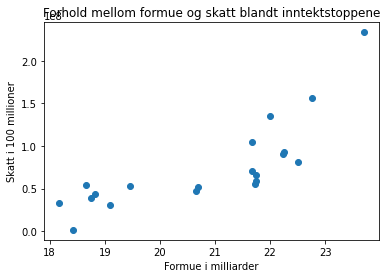

In [62]:
from matplotlib import pyplot as plt #plotter dataen 
import numpy as np
fig,ax=plt.subplots()

#adding axis lables:
ax.set_xlabel('Formue i milliarder')
ax.set_ylabel('Skatt i 100 millioner')
plt.title('Forhold mellom formue og skatt blandt inntektstoppene')

#plotting the function:
ax.scatter(np.log(data['Formue']), data['Skatt'])

Skal lage plottet for mappeoppgave 5 til det interaktivt plott

In [63]:
data['size']=data['Formue'].apply(lambda formue: formue**0.5/1000)
data

,Unnamed: 0,Navn,Inntekt,Formue,Skatt,size
0,1.0,"TROND MOHNBergen, 1943",303269738,3606959160,135160646,60.057965
1,2.0,"IVAR ERIK TOLLEFSENBærum, 1961",289644215,7648362960,156536011,87.454920
2,3.0,"ØYSTEIN STRAY SPETALENOslo, 1962",258709731,2586723237,105131374,50.859839
3,4.0,"GUSTAV MAGNAR WITZØEFrøya, 1993",211595385,19617118157,233600333,140.061123
4,5.0,"ØYSTEIN MOANOslo, 1959",181404420,961391825,52228271,31.006319
5,6.0,"ØYVIND GROTMOLBærum, 1980",168981563,127304452,54596137,11.282927
6,7.0,"MAGNUS REITANOslo, 1975",166542768,4620795695,92706050,67.976435
7,8.0,"OLE ROBERT REITANOslo, 1971",162833343,4546957558,90924296,67.431132
8,9.0,"EKATERINA MOHNBergen, 1981",158931093,279843781,52579391,16.728532
9,10.0,"MARGARET BOEL GARMANNOslo, 1955",154930624,2562173467,70855059,50.617916


In [64]:
data.insert(2, "Kjønn", ["Gutt", "Gutt", "Gutt", "Gutt", "Gutt", "Gutt", "Gutt", "Gutt", "Jente", "Jente", "Gutt", "Gutt", "Gutt", "Gutt", "Gutt", "Gutt", "Gutt", "Gutt", "Gutt", "Gutt"], True)
Kjønns={'Gutt': 'gutt', 'Jente': 'jente'}
colors={'Gutt': '#98F5FF', 'Jente': '#FF1493'}

data['kjønn']=data['Kjønn'].apply(lambda cont:  Kjønns[cont])
data['colors']=data['Kjønn'].apply(lambda cont: colors[cont])
data



,Unnamed: 0,Navn,Kjønn,Inntekt,Formue,Skatt,size,kjønn,colors
0,1.0,"TROND MOHNBergen, 1943",Gutt,303269738,3606959160,135160646,60.057965,gutt,#98F5FF
1,2.0,"IVAR ERIK TOLLEFSENBærum, 1961",Gutt,289644215,7648362960,156536011,87.454920,gutt,#98F5FF
2,3.0,"ØYSTEIN STRAY SPETALENOslo, 1962",Gutt,258709731,2586723237,105131374,50.859839,gutt,#98F5FF
3,4.0,"GUSTAV MAGNAR WITZØEFrøya, 1993",Gutt,211595385,19617118157,233600333,140.061123,gutt,#98F5FF
4,5.0,"ØYSTEIN MOANOslo, 1959",Gutt,181404420,961391825,52228271,31.006319,gutt,#98F5FF
5,6.0,"ØYVIND GROTMOLBærum, 1980",Gutt,168981563,127304452,54596137,11.282927,gutt,#98F5FF
6,7.0,"MAGNUS REITANOslo, 1975",Gutt,166542768,4620795695,92706050,67.976435,gutt,#98F5FF
7,8.0,"OLE ROBERT REITANOslo, 1971",Gutt,162833343,4546957558,90924296,67.431132,gutt,#98F5FF
8,9.0,"EKATERINA MOHNBergen, 1981",Jente,158931093,279843781,52579391,16.728532,jente,#FF1493
9,10.0,"MARGARET BOEL GARMANNOslo, 1955",Jente,154930624,2562173467,70855059,50.617916,jente,#FF1493


In [65]:
data[['Navn', 'Fodt']] = data['Navn'].str.split(',', expand=True)
data

,Unnamed: 0,Navn,Kjønn,Inntekt,Formue,Skatt,size,kjønn,colors,Fodt
0,1.0,TROND MOHNBergen,Gutt,303269738,3606959160,135160646,60.057965,gutt,#98F5FF,1943
1,2.0,IVAR ERIK TOLLEFSENBærum,Gutt,289644215,7648362960,156536011,87.454920,gutt,#98F5FF,1961
2,3.0,ØYSTEIN STRAY SPETALENOslo,Gutt,258709731,2586723237,105131374,50.859839,gutt,#98F5FF,1962
3,4.0,GUSTAV MAGNAR WITZØEFrøya,Gutt,211595385,19617118157,233600333,140.061123,gutt,#98F5FF,1993
4,5.0,ØYSTEIN MOANOslo,Gutt,181404420,961391825,52228271,31.006319,gutt,#98F5FF,1959
5,6.0,ØYVIND GROTMOLBærum,Gutt,168981563,127304452,54596137,11.282927,gutt,#98F5FF,1980
6,7.0,MAGNUS REITANOslo,Gutt,166542768,4620795695,92706050,67.976435,gutt,#98F5FF,1975
7,8.0,OLE ROBERT REITANOslo,Gutt,162833343,4546957558,90924296,67.431132,gutt,#98F5FF,1971
8,9.0,EKATERINA MOHNBergen,Jente,158931093,279843781,52579391,16.728532,jente,#FF1493,1981
9,10.0,MARGARET BOEL GARMANNOslo,Jente,154930624,2562173467,70855059,50.617916,jente,#FF1493,1955


In [67]:
from bokeh.plotting import figure

#creating figure:
p = figure(
        title = "Forhold mellom skatt og formue", 
        x_axis_label = 'Formue',
        y_axis_label = 'Skatt',
    
        x_axis_type = "log",
    
        tools="hover", 
        tooltips = [
            ("Navn","@Navn"),
            ("Inntekt","@Inntekt"),
            ("Formue","@Formue"),
            ("Skatt","@Skatt"),
            ("Fodt", "@Fodt")
            ],
    
        plot_height = 580,
        plot_width = 980)

In [68]:
from bokeh.io import show, output_notebook
from bokeh.plotting import output_file

p.scatter(
    source=data,
    x= 'Formue', 
    y= 'Skatt',
    color= 'colors',
    size='size', 
    alpha= 0.8
    )

p.xaxis.major_label_overrides = { 100000000: '100 millioner', 1000000000: '1 milliard', 10000000000: '10 milliarder' }
p.yaxis.major_label_overrides = { 0: '1 million', 50000000: '50 millioner', 100000000: '100 millioner', 150000000: '150 millioner', 200000000: '200 millioner' }



#Creating the graph and saving as html
output_notebook()
output_file("norges 20 rikeste.html")
show(p)

Loading BokehJS ...

Har laget et interaktivt plot, der fargen på sirkelen angir kjønn på personen. Informasjonen om personen kommer opp når du holder musa over sirkelen. Størrelsen på sirkelen angir størrelesn på formuen til personen.